# Tp: Clustering 

## Kmeans sur une image 

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage
import scipy
from scipy import signal

In [2]:
image = cv2.imread('eleph.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('eleph2.jpg', quant)
image2=cv2.imread('eleph.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

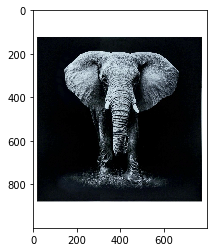

In [3]:
plt.imshow(image)


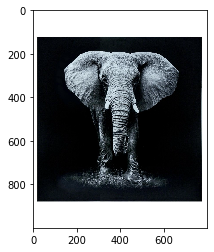

In [4]:
plt.imshow(image2)

### Définir une fonction de Kmeans  aen specifiant x qui presente le nombre de clusters 

In [5]:
def segm(x):
    image = cv2.imread('lion.jpg')
    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = x)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    plt.figure(figsize=(14,20))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(quant)
    return plt.show()

In [6]:
interact(segm, x=widgets.IntSlider(min=1, max=10, step=1, value=2))

interactive(children=(IntSlider(value=2, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.segm(x)>

## Ajouter un bruit à une image 

In [7]:
import skimage.io
import matplotlib.pyplot as plt
img_path="lion.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(mode):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.figure(figsize=(18,24))
    plt.show()

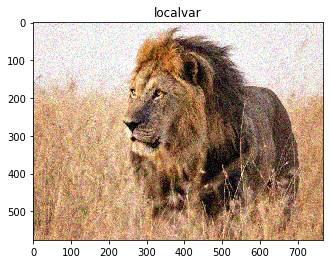

<Figure size 1296x1728 with 0 Axes>

In [8]:
plotnoise("localvar")

### Définir le bruit 

In [9]:
interact(plotnoise,mode=["gaussian","localvar","salt","s&p","poisson"])

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'salt', 's&p', 'poisson'),…

<function __main__.plotnoise(mode)>

## Ajouter un bruit au l'image puis l'élimine
### Bruit gaussian avec filtrage Gaussian

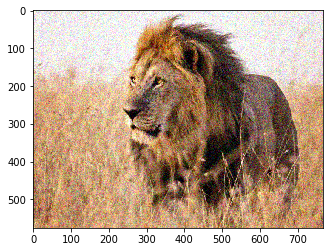

In [10]:
gimg = skimage.util.random_noise(img, "gaussian")
plt.imshow(gimg)  

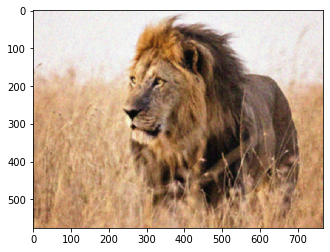

In [11]:
newImg = cv2.GaussianBlur(gimg, (5, 5), 3)
plt.imshow(newImg)

### Filtrage 2D 

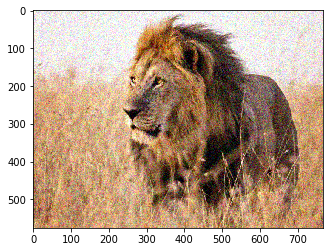

In [12]:
plt.imshow(gimg)

In [13]:
def filtrage2D(i):
    img7=cv2.filter2D(gimg, -1, np.array([[1 for i in range(3)] for j in range(3)], dtype = np.float) / i)
    plt.imshow(img7)

In [14]:
interact(filtrage2D, i=widgets.IntSlider(min=1, max=10, step=1, value=8))

interactive(children=(IntSlider(value=8, description='i', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.filtrage2D(i)>

# Segmentation 

On appelle segmentation d'une image l'opération consistant à identifier les structures d'intérêt dans cette image. On distingue deux types d'approches pour la segmentation : contour ou région.

Dans l'approche contour, on cherche à isoler le ou les contours des objets d'intérêt. Le résultat se présente en général sous la forme d'un ensemble de chaînes de pixels, et des traitements additionnels sont souvent nécessaires pour associer les contours aux objets d'intérêt.

L'autre approche cherche à identifier des régions de pixels homogènes au sein de l'image. Le critère d'homogénéité peut être l'intensité, la couleur, ou même la texture locale. Le résultat se présente soit sous la forme d'une image binaire, soit d'une image étiquetée, chaque étiquette ou label correspondant à une région. Les méthodes de seuillage et la ligne de partage des eaux sont les représentantes emblématiques de cette approche.

## Image Segmentation using K-Means
L'algorithme KMeans est un algorithme non supervisé et il est utilisé pour segmenter la zone d'intérêt à partir de l'arrière-plan. Il regroupe ou partitionne les données données en K-clusters.

In [15]:
def kmeans(k):
    image = cv2.imread('lion.jpg')
    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    plt.figure(figsize=(14,20))
    plt.imshow(quant)

In [16]:
interact(kmeans, k=widgets.IntSlider(min=1, max=10, step=1, value=2))

interactive(children=(IntSlider(value=2, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.kmeans(k)>

### Image Segmentation using Contour Detection

In [17]:
img = cv2.imread('lion.jpg')
img1 = cv2.resize(img,(256,256))
gray = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY) #Convertissez l'image en niveaux de gris.
#Calculez le seuil de l'image en niveaux de gris (les pixels au-dessus du seuil sont convertis en blanc sinon zéro.
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

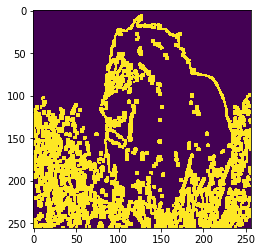

In [18]:
plt.imshow(edges)

## Image Segmentation using Thresholding

In [31]:
from skimage.filters import threshold_otsu
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

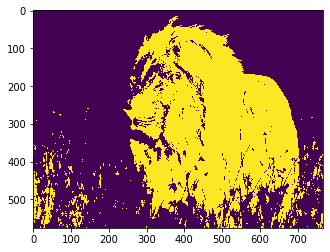

In [32]:
plt.imshow(img_otsu)